<a href="https://colab.research.google.com/github/rushilg13/foodai/blob/master/Foodai_ModelTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)              

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
32/32 [==============================] - 7s 191ms/step - loss: 1.5466 - accuracy: 0.2050 - val_loss: 1.3555 - val_accuracy: 0.3500
Epoch 2/50
32/32 [==============================] - 5s 159ms/step - loss: 1.3591 - accuracy: 0.3575
Epoch 3/50
32/32 [==============================] - 5s 161ms/step - loss: 1.0392 - accuracy: 0.5634
Epoch 4/50
32/32 [==============================] - 5s 163ms/step - loss: 0.9923 - accuracy: 0.5998
Epoch 5/50
32/32 [==============================] - 5s 168ms/step - loss: 0.7082 - accuracy: 0.7770
Epoch 6/50
32/32 [==============================] - 5s 161ms/step - loss: 0.5419 - accuracy: 0.7842
Epoch 7/50
32/32 [==============================] - 5s 158ms/step - loss: 0.5385 - accuracy: 0.7580
Epoch 8/50
32/32 [==============================] - 6s 195ms/step - loss: 0.4878 - accuracy: 0.7885
Epoch 9/50
32/32 [==============================] - 6s 162ms/step - loss: 0.6043 - accuracy: 0.7968
Epoch 10/50
32/32 [==============================] - 5s 15

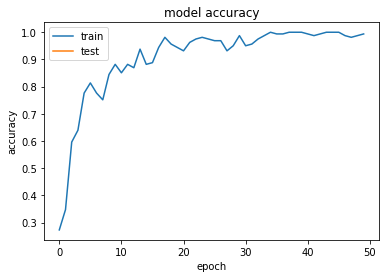

[[0. 1. 0. 1.]]


In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D, Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(classifier.summary())

# Step 2 - Preparing the train/test data and training the model

# Code copied from - https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/foodai/dataset',
                                                 target_size=(64, 64),
                                                 batch_size=5,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/foodai/test',
                                            target_size=(64, 64),
                                            batch_size=5,
                                            class_mode='categorical') 
history=classifier.fit_generator(
        training_set,
        steps_per_epoch=161/5, 
        epochs=50,
        validation_data=test_set,
        validation_steps=20)# No of images in test set

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import numpy as np
from keras.preprocessing import image

test=image.load_img('/content/gdrive/My Drive/foodai/test/burger/2.jpg',target_size = (64, 64))
test=image.img_to_array(test)
test=np.expand_dims(test, axis=0)

result=classifier.predict(test)
training_set.class_indices
print (result)

# Saving the model
# model_json = classifier.to_json()
# with open("food_model.json", "w") as json_file:
#     json_file.write(model_json)
# classifier.save_weights('food_model.h5')


In [21]:

import numpy as np
from keras.preprocessing import image

test=image.load_img('/content/gdrive/My Drive/foodai/test/pizza/1.jpg',target_size = (64, 64))
test=image.img_to_array(test)
test=np.expand_dims(test, axis=0)

result=classifier.predict(test)
training_set.class_indices
print (result)

[[0. 0. 0. 1.]]


In [27]:
classifier.save("/content/gdrive/My Drive/my_model.h5")

In [31]:
# No need
model_json = classifier.to_json()
with open("food_model_R.json", "w") as json_file:
    json_file.write(model_json)
print(model_json)

{"class_name": "Sequential", "config": {"name": "sequential_16", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_32_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_32", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_32", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides":

In [32]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/gdrive/My Drive/my_model.h5')

In [40]:
import numpy as np
from keras.preprocessing import image

test=image.load_img('/content/gdrive/My Drive/foodai/test/burger/2.jpg',target_size = (64, 64))
test=image.img_to_array(test)
test=np.expand_dims(test, axis=0)

result=model.predict(test)
training_set.class_indices
print (result)


[[0. 1. 0. 1.]]


In [41]:
if (result[0][0]==1):
        outcome='Biryani'
elif (result[0][1]==1):
    outcome='Burger'
elif ( result[0][2]==1):
    outcome='Chicken Wings'
elif (result[0][3]==1):
    outcome='Pizza'
else:
    outcome='Unable Determine'
    
print('result:', outcome)

result: Burger
